[1.65300540e-39 9.98832192e-36 3.86191011e-32 9.55439434e-29
 1.51250053e-25 1.53207236e-22 9.93011764e-20 4.11832750e-17
 1.09289575e-14 1.85578631e-12 2.01636230e-10 1.40184675e-08
 6.23625526e-07 1.77516448e-05 3.23329019e-04 3.76827112e-03
 2.81015950e-02 1.34094564e-01 4.09432905e-01 7.99918398e-01
 1.00000000e+00 7.99918398e-01 4.09432905e-01 1.34094564e-01
 2.81015950e-02 3.76827112e-03 3.23329019e-04 1.77516448e-05
 6.23625526e-07 1.40184675e-08 2.01636230e-10 1.85578631e-12]


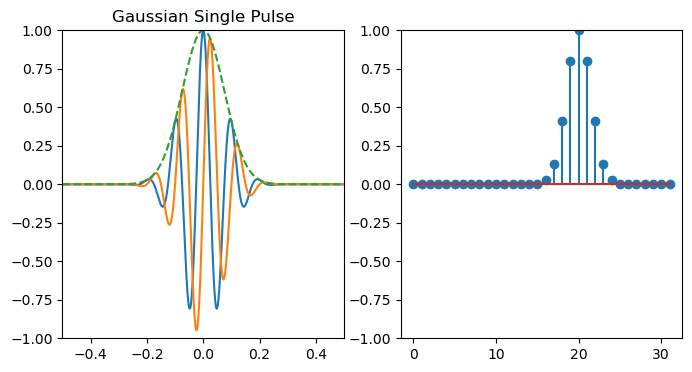

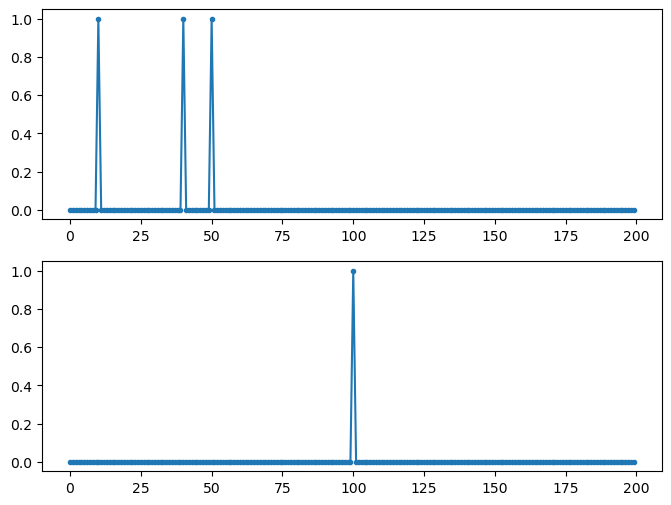

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from scipy import signal

sampling_rate = 16000
time_seconds = 1 
number_of_pulses = 20
pulse_frequency = 1/(time_seconds/(number_of_pulses/2))

t0 = np.linspace(-1*time_seconds, 1*time_seconds, sampling_rate, endpoint=False)

signal_dbfs = 0.8 #-1dBFS

fig1 = plt.figure(figsize = (8,4), facecolor='white')


# Create multiple pngs:
m = 32

e_at_zeroposition = np.zeros(m)

for ii in range(m):

    i, q, e = signal.gausspulse(t0, fc=10 + 0*ii, retquad=True, retenv=True)
    

    e_at_zeroposition[ii] = e[0 + 400*ii]

    t1 = t0 + 0.03*ii - 0.5

    ax1 = fig1.add_subplot(1, 2, 1)
    ax1.set_title("Gaussian Single Pulse")
    ax1.plot(t1, i, t1, q, t1, e, '--')
    ax1.set_xlim([-0.5, 0.5])
    ax1.set_ylim([-1, 1])
    
    ax12= fig1.add_subplot(1, 2, 2)
    ax12.stem(e_at_zeroposition)
    ax12.set_ylim([-1,1])

    plt.savefig(f"{sampling_rate}_{ii}.png", dpi=300)
    
    plt.clf()

print(e_at_zeroposition)

# For static graph:

ax1 = fig1.add_subplot(1, 2, 1)
ax1.set_title("Gaussian Single Pulse")
ax1.set_xlim([-0.5, 0.5])
ax1.set_ylim([-1, 1])
ax1.plot(t0, i, t0, q, t0, e, '--')

ax12= fig1.add_subplot(1, 2, 2)
ax12.stem(e_at_zeroposition)
ax12.set_ylim([-1,1])

# Scipy.signal.unit_impulse

imp1 = signal.unit_impulse(200, [10,40,50])
imp2 = signal.unit_impulse(200, 'mid')

fig2 = plt.figure(figsize = (8,6), facecolor='white')

ax21 = fig2.add_subplot(2, 1, 1)
ax22 = fig2.add_subplot(2, 1, 2)

ax21.plot(imp1,".-")
ax22.plot(imp2,".-")

plt.show()